<a href="https://colab.research.google.com/github/evertonsilvauea/trabalho_estatistica/blob/pcorrea/pcorrea-esilva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gráficos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

import statistics as st
from scipy import stats
from collections import Counter
import math


## Base de dados

In [2]:
dataset = pd.read_csv('/content/DadosEstatisticos-com-colunas-de-interesse.csv',sep=';',encoding = 'latin-1')
dataset.head()


,EMPRESA (SIGLA),EMPRESA (NOME),EMPRESA (NACIONALIDADE),ANO,MÊS,AEROPORTO DE ORIGEM (SIGLA),AEROPORTO DE ORIGEM (NOME),AEROPORTO DE ORIGEM (UF),AEROPORTO DE ORIGEM (REGIÃO),AEROPORTO DE ORIGEM (PAÍS),AEROPORTO DE ORIGEM (CONTINENTE),AEROPORTO DE DESTINO (SIGLA),AEROPORTO DE DESTINO (NOME),AEROPORTO DE DESTINO (UF),AEROPORTO DE DESTINO (REGIÃO),AEROPORTO DE DESTINO (PAÍS),AEROPORTO DE DESTINO (CONTINENTE),NATUREZA,PASSAGEIROS PAGOS,PASSAGEIROS GRÁTIS,CARGA PAGA (KG),CARGA GRÁTIS (KG),DISTÂNCIA VOADA (KM),DECOLAGENS,ASSENTOS,HORAS VOADAS,BAGAGEM (KG)
0,AAL,"AMERICAN AIRLINES, INC.",ESTRANGEIRA,2000.0,1.0,KDFW,"DALLAS & FORT WORTH, TEXAS",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,SBGR,GUARULHOS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,INTERNACIONAL,3932.0,142.0,97876.0,0.0,247320.0,30.0,6330.0,"409,08",NaN
1,AAL,"AMERICAN AIRLINES, INC.",ESTRANGEIRA,2000.0,1.0,KJFK,"NEW YORK, NEW YORK",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,SBGL,RIO DE JANEIRO,RJ,SUDESTE,BRASIL,AMÉRICA DO SUL,INTERNACIONAL,2338.0,131.0,48066.0,0.0,224141.0,29.0,6119.0,"418,1",NaN
2,AAL,"AMERICAN AIRLINES, INC.",ESTRANGEIRA,2000.0,1.0,KJFK,"NEW YORK, NEW YORK",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,SBGR,GUARULHOS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,INTERNACIONAL,2892.0,127.0,194997.0,0.0,222256.0,29.0,6119.0,"411,5",NaN
3,AAL,"AMERICAN AIRLINES, INC.",ESTRANGEIRA,2000.0,1.0,KMIA,"MIAMI, FLORIDA",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,SBCF,CONFINS,MG,SUDESTE,BRASIL,AMÉRICA DO SUL,INTERNACIONAL,997.0,20.0,91022.0,493.0,NaN,NaN,NaN,NaN,NaN
4,AAL,"AMERICAN AIRLINES, INC.",ESTRANGEIRA,2000.0,1.0,KMIA,"MIAMI, FLORIDA",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,SBGL,RIO DE JANEIRO,RJ,SUDESTE,BRASIL,AMÉRICA DO SUL,INTERNACIONAL,3589.0,133.0,29865.0,6429.0,208227.0,31.0,6541.0,"491,8",NaN


In [3]:
dataset_manaus_2017 = dataset[dataset['ANO']==2017] 
_dataset_manaus = dataset_manaus_2017[dataset_manaus_2017['AEROPORTO DE ORIGEM (NOME)']=='MANAUS'] 
groupby_manaus_2017 = _dataset_manaus[['AEROPORTO DE ORIGEM (NOME)','AEROPORTO DE DESTINO (NOME)','MÊS','ANO','BAGAGEM (KG)']].groupby(_dataset_manaus['BAGAGEM (KG)'])
groupby_manaus_2017.head(12)
# print(type(groupby_manaus_2017))

,AEROPORTO DE ORIGEM (NOME),AEROPORTO DE DESTINO (NOME),MÊS,ANO,BAGAGEM (KG)
747866,MANAUS,"NEW YORK, NEW YORK",1.0,2017.0,NaN
747867,MANAUS,"MIAMI, FLORIDA",1.0,2017.0,NaN
747868,MANAUS,NASSAU/INTL NEW PROVIDENCE,1.0,2017.0,NaN
747892,MANAUS,"MIAMI, FLORIDA",2.0,2017.0,NaN
747916,MANAUS,"MIAMI, FLORIDA",3.0,2017.0,NaN
...,...,...,...,...,...
786504,MANAUS,COARI,9.0,2017.0,15787.0
786524,MANAUS,TEFÉ,10.0,2017.0,406.0
786525,MANAUS,COARI,10.0,2017.0,15006.0
786551,MANAUS,COARI,11.0,2017.0,15697.0


## Gráfico de dispersão

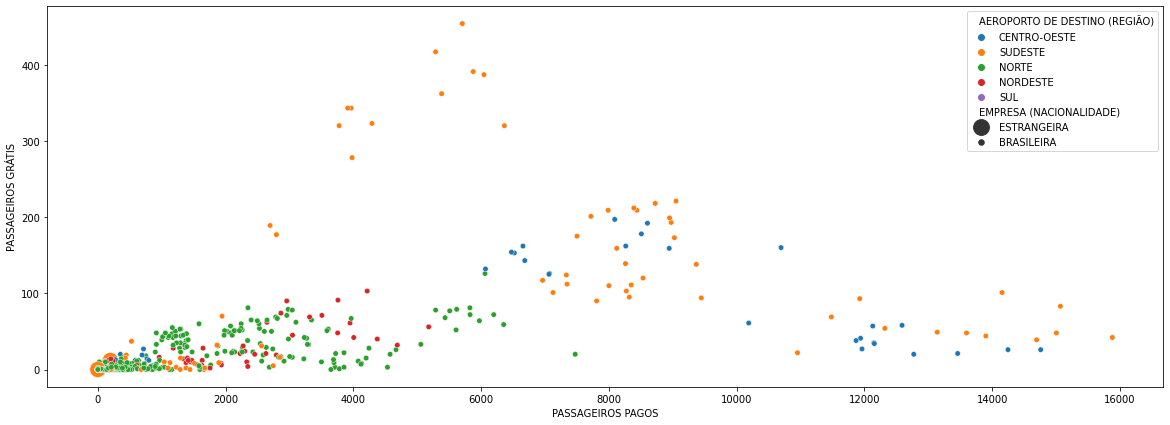

In [6]:
f, ax = plt.subplots(figsize=(20, 7))
disperssao = sns.scatterplot(x = 'PASSAGEIROS PAGOS', y = 'PASSAGEIROS GRÁTIS', data=_dataset_manaus,
            hue = 'AEROPORTO DE DESTINO (REGIÃO)', size = 'EMPRESA (NACIONALIDADE)',sizes=(30,250));


## Gráfico de barra e setor (pizza)

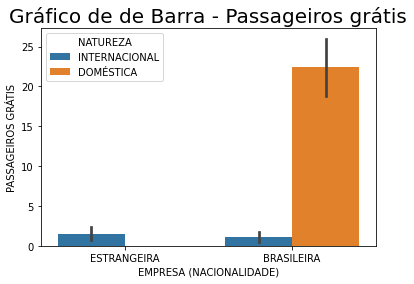

In [7]:
plt.title('Gráfico de de Barra - Passageiros grátis', fontsize=20)
sns.barplot(x = 'EMPRESA (NACIONALIDADE)', y = 'PASSAGEIROS GRÁTIS', data=_dataset_manaus, hue = 'NATUREZA');

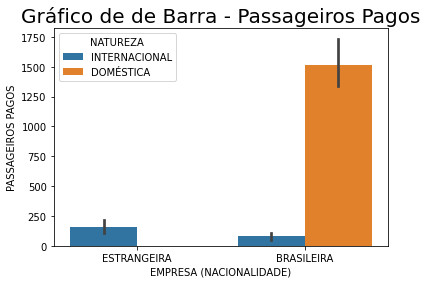

In [8]:
plt.title('Gráfico de de Barra - Passageiros Pagos', fontsize=20)
sns.barplot(x = 'EMPRESA (NACIONALIDADE)', y = 'PASSAGEIROS PAGOS', data=_dataset_manaus, hue = 'NATUREZA');

##Quantidade de voos que partem de Manaus para cada destino

###Funções

In [37]:
def showVolumeBagagens():
  _dataset_manaaus_bagagens = dataset.loc[dataset['AEROPORTO DE ORIGEM (NOME)'] == 'MANAUS'].groupby(['ANO'])['BAGAGEM (KG)'].size().reset_index().rename(columns={0: 'Total', 'publicationDate':'Date'})
  _dataset_manaaus_bagagens = f = _dataset_manaaus_bagagens.rename(columns={'publicationDate':'Date'})

  x = _dataset_manaaus_bagagens['ANO']
  y = _dataset_manaaus_bagagens['BAGAGEM (KG)']
  plt.figure(figsize=(30,10))#tamanho do grafico
  plt.plot(x,y,label='Volume de Bagagens dos voos de Manaus',color='red',linestyle='dashed',linewidth=2,marker = "*")
  #titulo
  plt.title('Volume de Bagagens dos voos que partem de Manaus')
  #EIXO X
  plt.xlabel('ANO')
  #EIXO Y 
  plt.ylabel('BAGAGEM (KG)')
  plt.grid(True)
  plt.legend()

In [13]:
def qntdDestinosDeManaus():
  fig = plt.figure(figsize=(30,10))
  plt.title("Quantidade dos destinos dos voos que partem de Manaus")
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  sns.countplot(y='AEROPORTO DE DESTINO (NOME)',order=_dataset_manaus['AEROPORTO DE DESTINO (NOME)'].value_counts().iloc[:20].index, data=_dataset_manaus, palette='crest',)

In [14]:
def functionStatiscals_manaus(colum):
  _res = 0
  i = 0
  passageiros_gratis = []
  for x in _dataset_manaus[colum]:
    # print(np.asarray(x))
    x = np.asarray(x)
    i = i + 1
    if not math.isnan(x):
      _res = _res + int(x)
      
      passageiros_gratis.append(int(x))
  
  print(f'{colum:#^90}\n')
  media = round(st.mean(passageiros_gratis))
  mediana = round(st.median(passageiros_gratis))
  moda = round(st.mode(passageiros_gratis))
  desstandard = round(st.pstdev(passageiros_gratis))
  variancia = round(st.variance(passageiros_gratis))
  coeficiente_de_variação = coeficient_of_variation(passageiros_gratis)
  resultdescribe = stats.describe(_dataset_manaus[colum].dropna())
  line = [media,mediana,moda,desstandard,variancia,coeficiente_de_variação]
  print(f'Média        Mediana       Moda   Desvio Padrão    Variância       Coeficiente de Variação\n')
  print(f'{media}   {mediana:>13,.2f} {moda:>9,.2f}     {desstandard:>1,.2f}     {variancia:>9,.2f}      {coeficiente_de_variação:>11,.2f}') 
#   print(f'Describe {resultdescribe}')

#functionStatiscals_manaus('BAGAGEM (KG)',_dataset_manaus)

In [15]:
def coeficient_of_variation(var):
  _cv = round(100*st.stdev(var)/st.mean(var), 2)
  return _cv

In [16]:
def plotBox(colum):
  _res_boxplot = sns.boxplot(_dataset_manaus[colum])
  _res_boxplot.figure.set_size_inches(15,7)
  _res_boxplot.set_title(colum, fontsize=20)

In [17]:
def plotDist(colum):
  _res_boxplot = sns.distplot(_dataset_manaus[colum])
  _res_boxplot.figure.set_size_inches(15,7)
  _res_boxplot.set_title(colum, fontsize=20)

In [35]:
def plotPizza(colum,*item):
  plt.rcParams.update({'font.size':20})
  label = [*item]
  x = _dataset_manaus.groupby(by=colum).size()
  explode = (0.1,0)
  plt.figure(figsize=(10,10))
  plt.pie(x=x, labels=label,explode=explode, autopct='%1.1f%%', startangle=90, shadow=True)
  plt.title('Classificação de voos Manaus',fontsize=20)


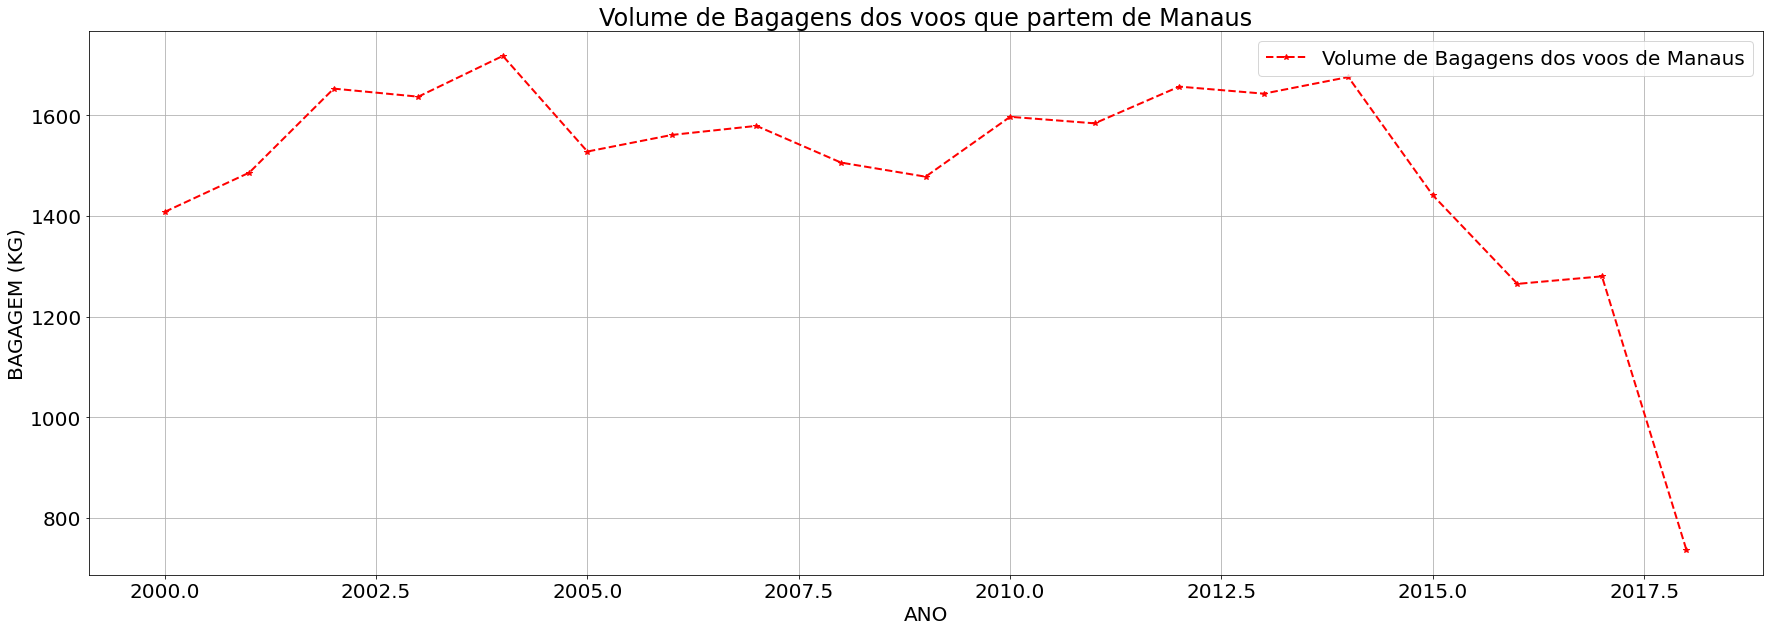

In [38]:
showVolumeBagagens()

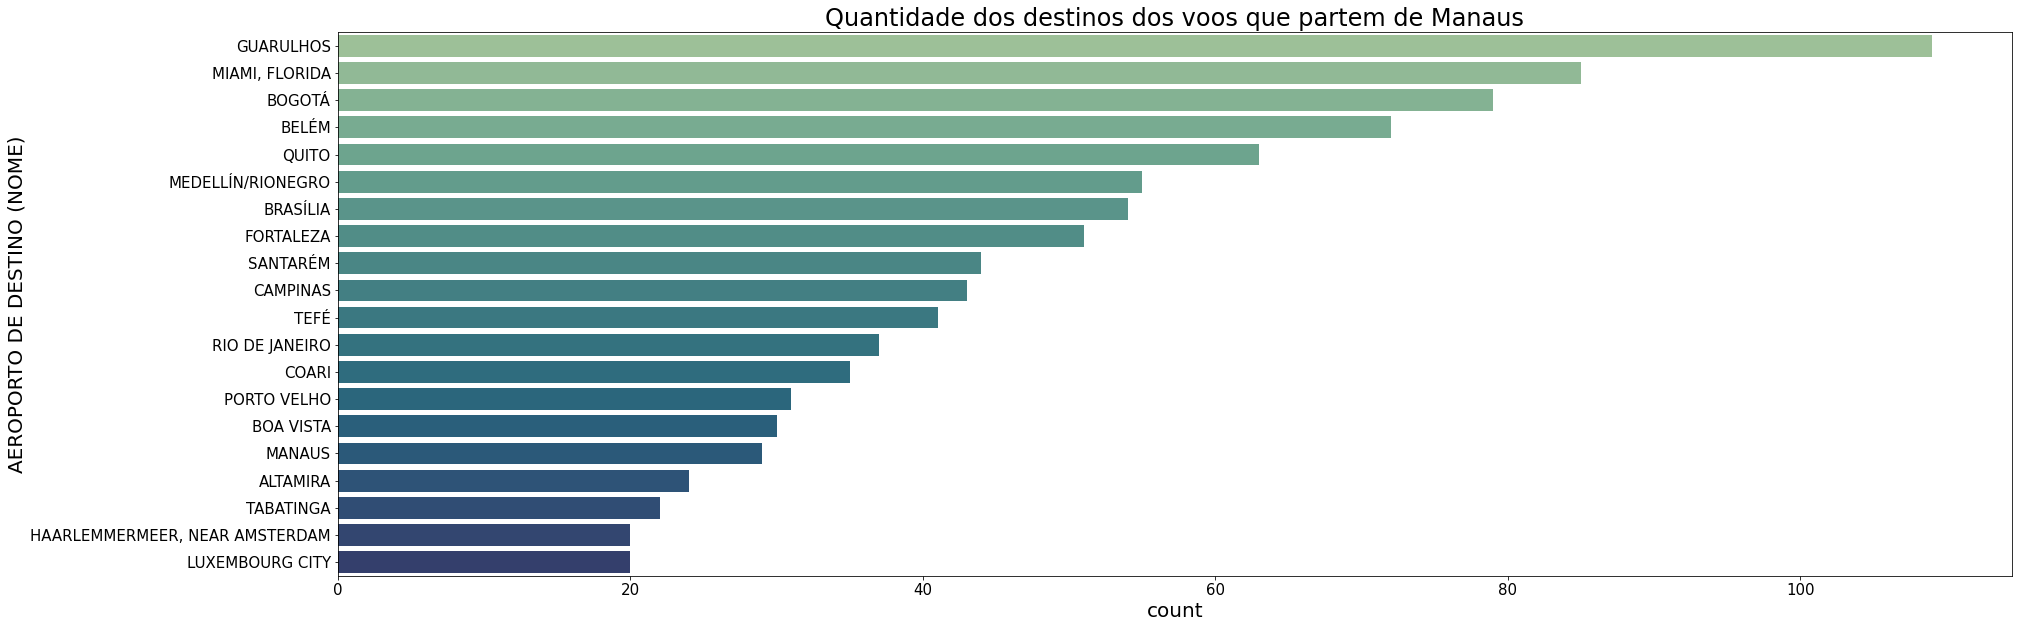

In [39]:
qntdDestinosDeManaus()

##Classificação de voos: Internacionais e Domésticos.

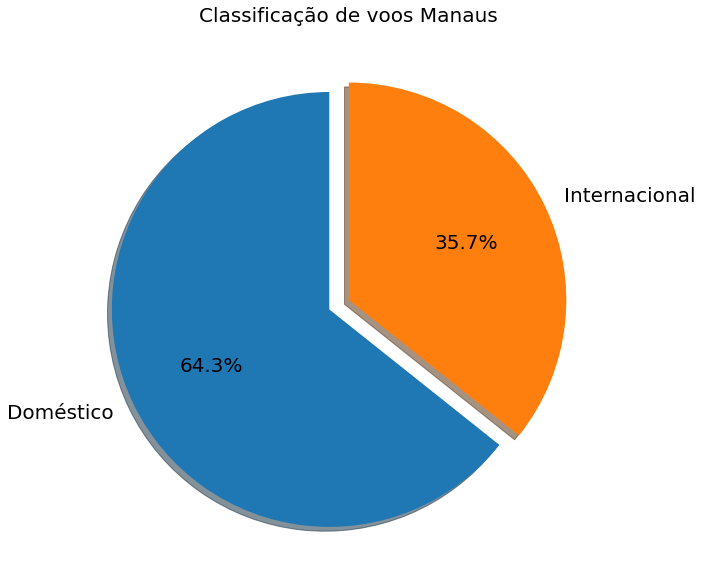

In [36]:
plotPizza('NATUREZA','Doméstico', 'Internacional')

##Mediana, Média, Moda e Desvio Padrão - Manaus

####Os dados dos voos como: carga e quantidade de passageiros que pagaram tem uma característica Assimétrica Positiva

###Voos Cargas Grátis

In [20]:
functionStatiscals_manaus('CARGA GRÁTIS (KG)')

####################################CARGA GRÁTIS (KG)#####################################

Média        Mediana       Moda   Desvio Padrão    Variância       Coeficiente de Variação

56            0.00      0.00     436.00     190,321.00           783.06


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


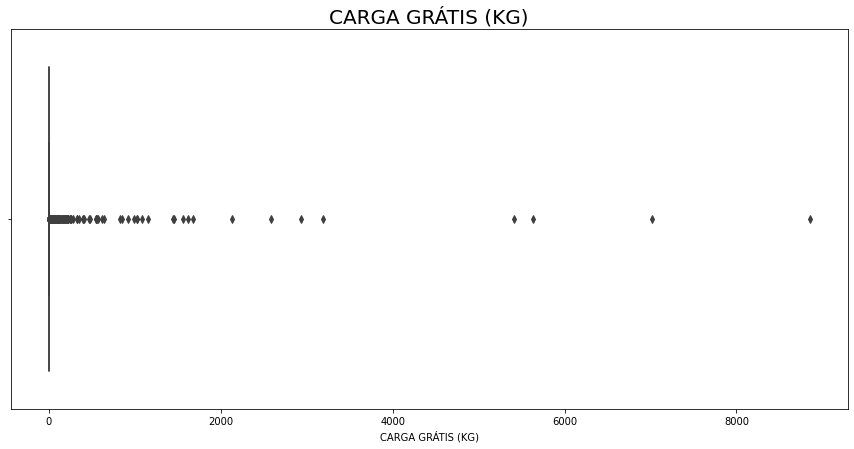

In [21]:
plotBox('CARGA GRÁTIS (KG)')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


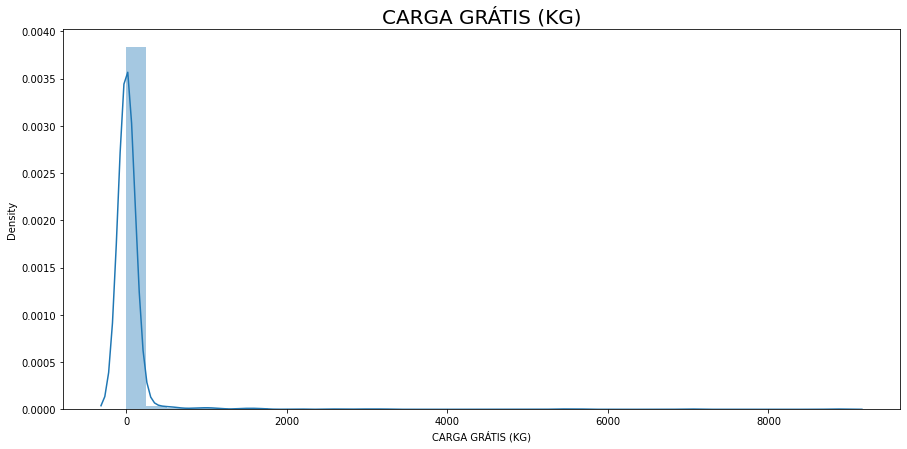

In [22]:
plotDist('CARGA GRÁTIS (KG)')

###Voos Carga Pagas

In [23]:
functionStatiscals_manaus('CARGA PAGA (KG)')

#####################################CARGA PAGA (KG)######################################

Média        Mediana       Moda   Desvio Padrão    Variância       Coeficiente de Variação

34024            0.00      0.00     149,676.00     22,420,595,476.00           440.09


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


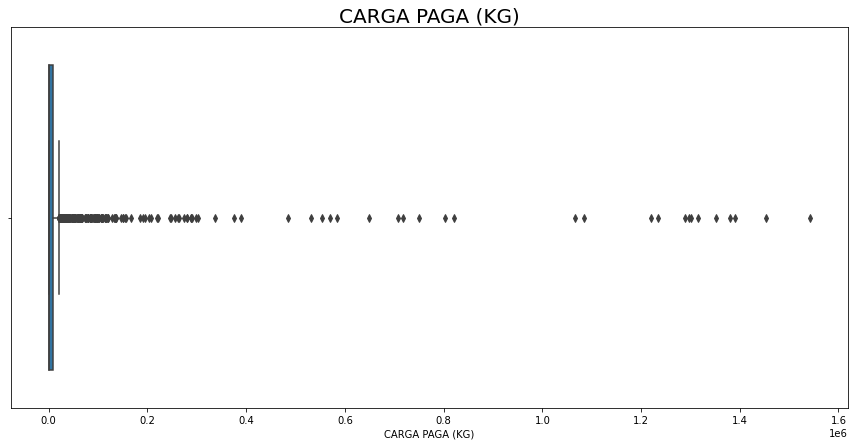

In [24]:
plotBox('CARGA PAGA (KG)')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


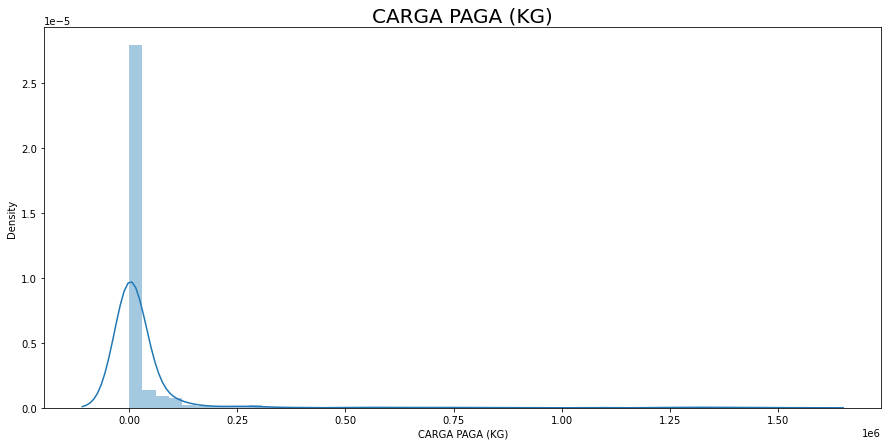

In [25]:
plotDist('CARGA PAGA (KG)')

###Voos Passageiros Grátis

In [26]:
functionStatiscals_manaus('PASSAGEIROS GRÁTIS')

####################################PASSAGEIROS GRÁTIS####################################

Média        Mediana       Moda   Desvio Padrão    Variância       Coeficiente de Variação

15            0.00      0.00     45.00      2,040.00           301.65


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


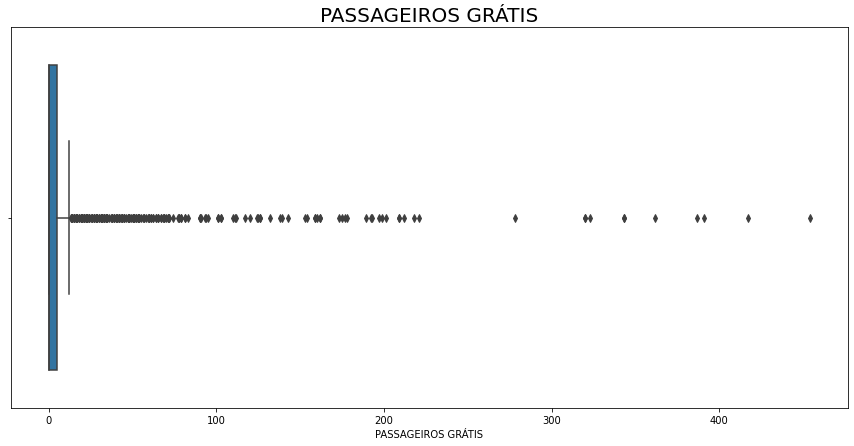

In [27]:
plotBox('PASSAGEIROS GRÁTIS')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


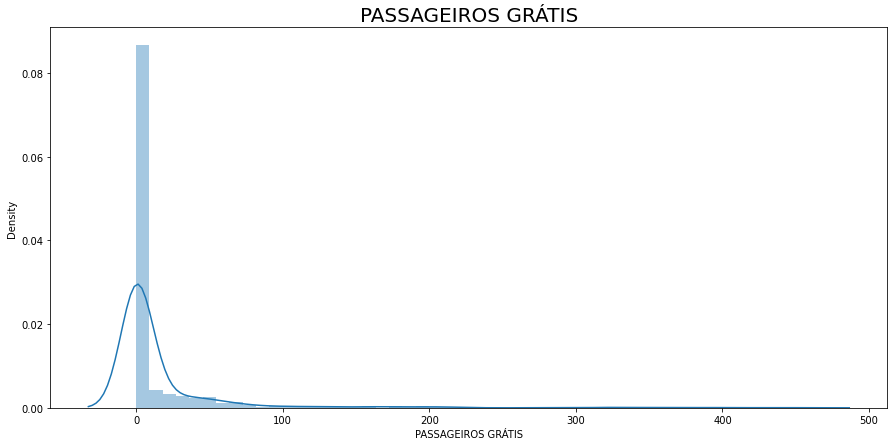

In [28]:
plotDist('PASSAGEIROS GRÁTIS')

###Voos Passageiros Pagos

In [29]:
functionStatiscals_manaus('PASSAGEIROS PAGOS')

####################################PASSAGEIROS PAGOS#####################################

Média        Mediana       Moda   Desvio Padrão    Variância       Coeficiente de Variação

1026           40.00      0.00     2,391.00     5,719,185.00           233.13


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


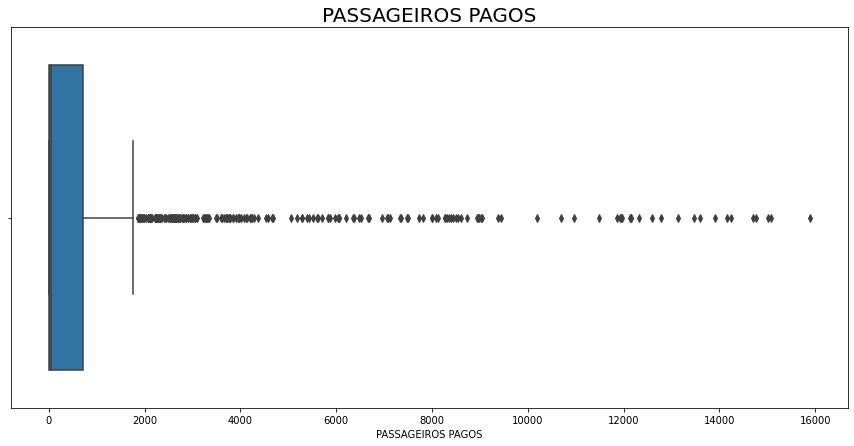

In [30]:
plotBox('PASSAGEIROS PAGOS')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


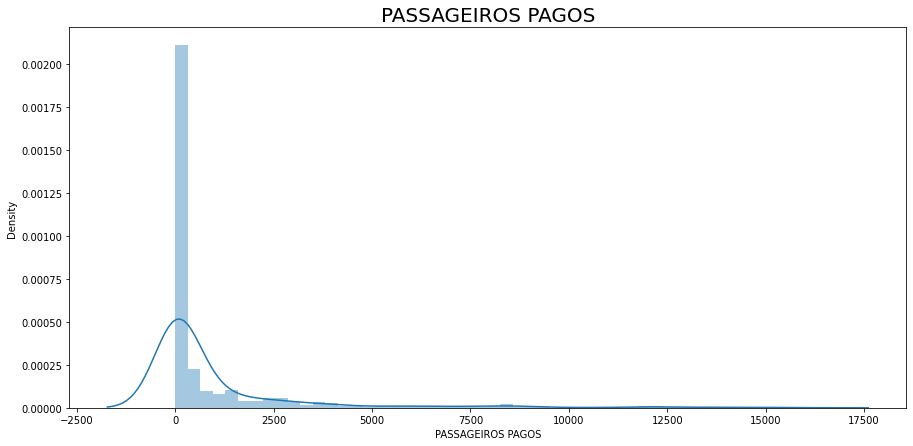

In [31]:
plotDist('PASSAGEIROS PAGOS')

###Voos Bagagens em KG

In [32]:
functionStatiscals_manaus('BAGAGEM (KG)')

#######################################BAGAGEM (KG)#######################################

Média        Mediana       Moda   Desvio Padrão    Variância       Coeficiente de Variação

14932        1,618.00      0.00     30,924.00     957,265,658.00           207.21


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


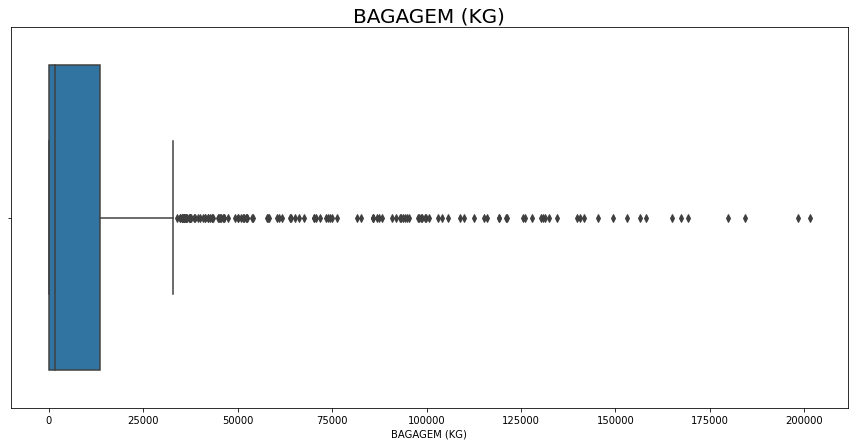

In [33]:
plotBox('BAGAGEM (KG)')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


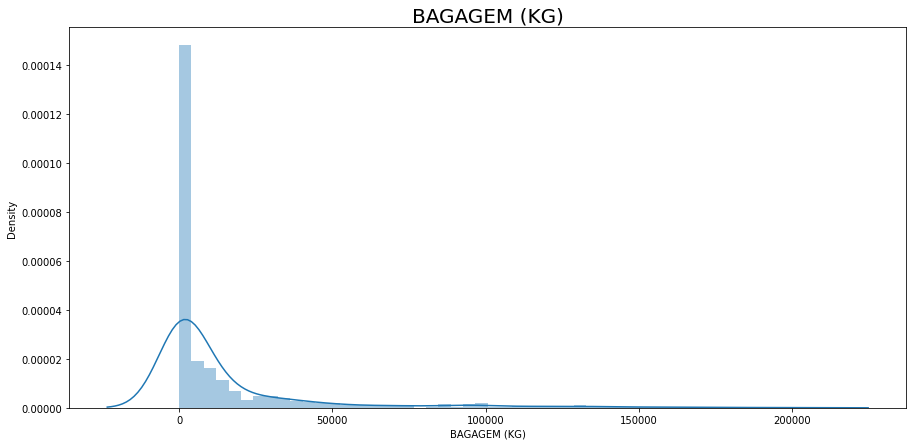

In [34]:
plotDist('BAGAGEM (KG)')